# Cleaning the data

We must first go through each attribute in every table and analyse them for anny outliers or null values.

## Import data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Load dataframes
awards_players = pd.read_csv('../data/awards_players.csv')
coaches = pd.read_csv('../data/coaches.csv')
players_teams = pd.read_csv('../data/players_teams.csv')
players = pd.read_csv('../data/players.csv')
series_post = pd.read_csv('../data/series_post.csv')
teams_post = pd.read_csv('../data/teams_post.csv')
teams = pd.read_csv('../data/teams.csv')

## Analyse table Players

We analyse the attributes of the table players.

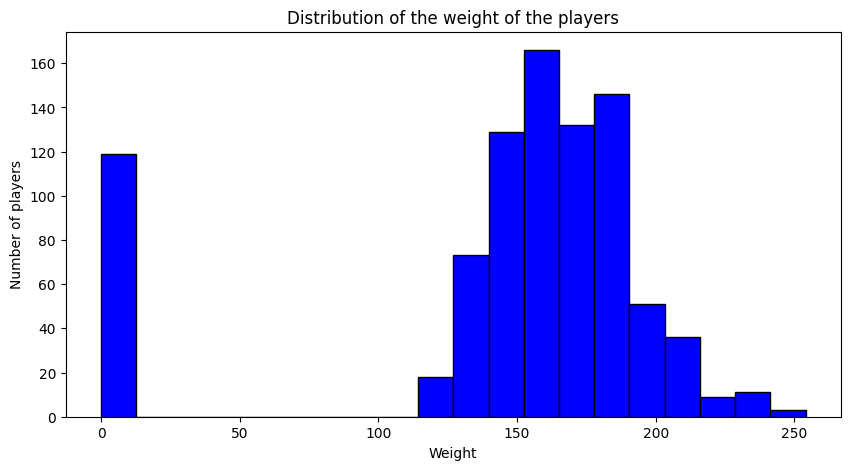

In [34]:
# make an histogram to show the distribution of the weight of the players
plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

We must ignore couches (since they all have weight 0)

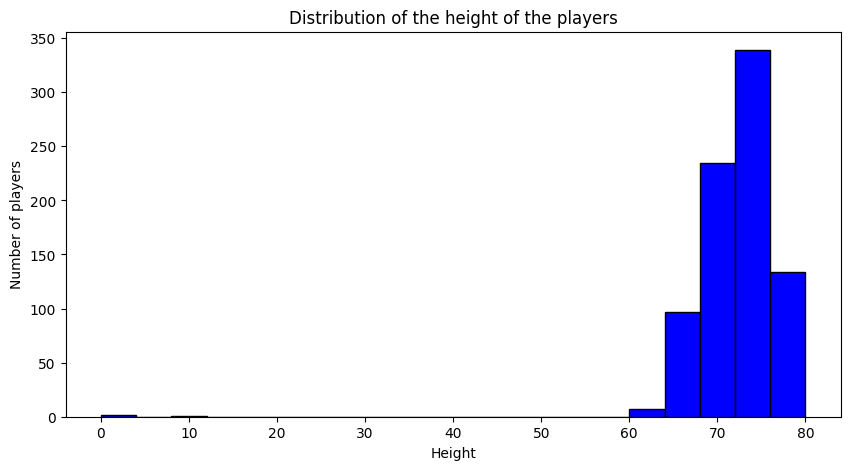

In [35]:
players = players[players['pos'].notnull()]

# make a histogram to show the distribution of the height of the players
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()


We see there is still unexpected values in the data. 

Let's test the same thing for weight.

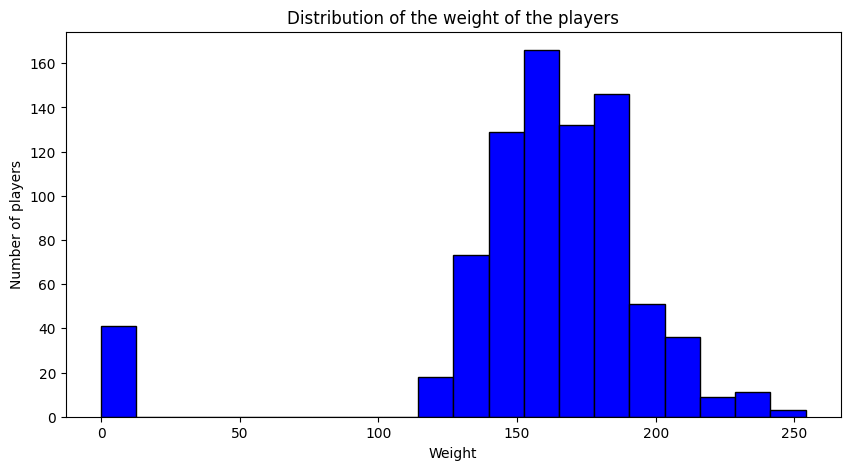

In [36]:
# make a histogram to show the distribution of the weight of the players
plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

There is players with 0 weight in the data. To fix the height and weight of the players with invalid height or weight we do the following:

1. We calculate the average BMI of the players with height and weight within expected boundaries
2. We calculate the height of the players with incorrect height but correct weight
3. We calculate the weight of the players with incorrect weight but correct height

In [37]:
## calculate the BMI of the players, note the weight is in pounds and the height is in inches
players['bmi'] = players['weight'] / (players['height'] ** 2) * 703

# remove the outliers
temp = players[players['weight'] > 100]
temo = temp[temp['height'] > 50]

# get the average BMI of the players with correct height and weight
average_bmi = temp['bmi'].mean()

# fix the height of the players with only incorrect height by calculating the height based on the average BMI and the players weight
players.loc[
    (players['height'] < 50) & (players['weight'] > 100), 
    'height'
] = (players['weight'] / (average_bmi * 703)) ** 0.5

# fix the weight of the players with only incorrect weight by calculating the weight based on the average BMI and the players height
players.loc[
    (players['weight'] < 100) & (players['height'] > 50), 
    'weight'
] = players['height'] ** 2 * average_bmi / 703

C:\Users\marco\AppData\Local\Temp\ipykernel_9024\1482397656.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[146.42379602 201.08248355 206.48043111 195.75603199 146.42379602
 155.71827526 201.08248355 206.48043111 180.20565326 201.08248355
 160.47275887 190.50107642 190.50107642 175.16518567 175.16518567
 201.08248355 170.19621408 195.75603199 180.20565326 175.16518567
 185.31761684 206.48043111 211.94987466 190.50107642 206.48043111
 195.75603199 206.48043111 190.50107642 185.31761684 190.50107642
 175.16518567 195.75603199 211.94987466 185.31761684 185.31761684
 185.31761684 201.08248355 185.31761684 206.48043111]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players.loc[


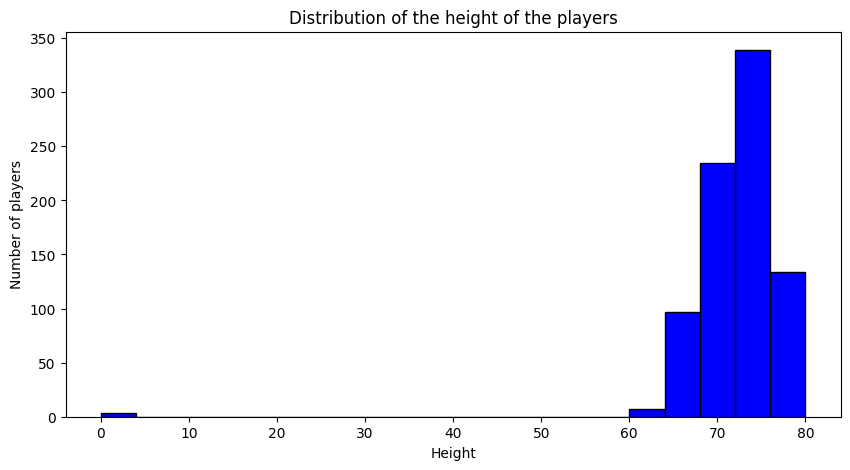

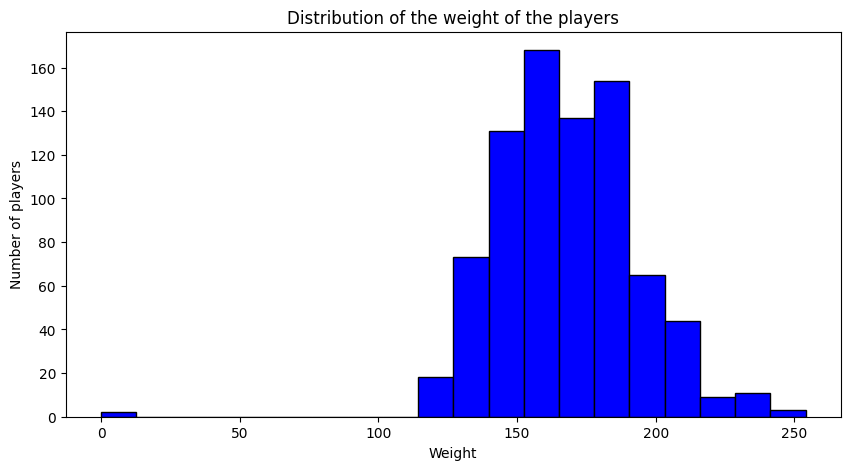

In [38]:
# show the histogram for the weight and height again
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()


We still see outliers, indicating that there are players with both incorrect height and weight. For those cases we change the height and weight for the average of the other players.

In [39]:
players.loc[players['weight'] < 100, 'weight'] = players[players['weight'] > 100]['weight'].mean()
players.loc[players['height'] < 50, 'height'] = players[players['height'] > 50]['height'].mean()

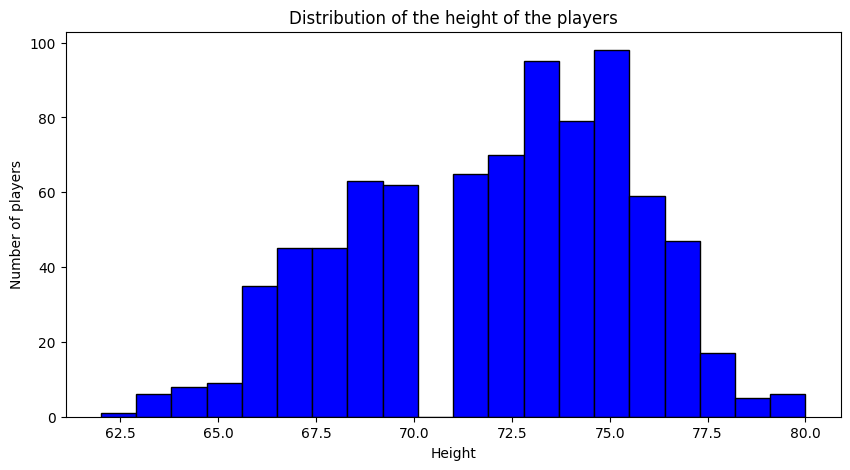

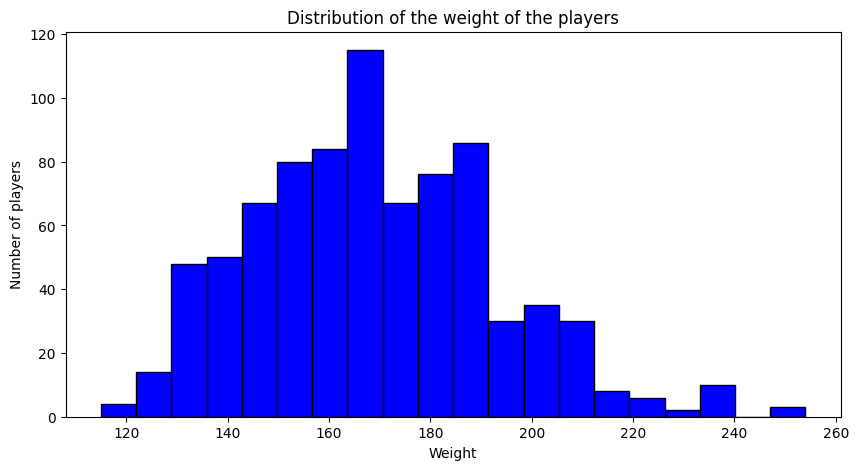

In [40]:
# show graphs again
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

In [41]:
# list all different "college" values ordered
players['college'].value_counts().sort_index()

college
Academy of Sport Moscow    1
Alabama                    7
Alabama-Birmingham         2
Arizona                    5
Arizona State              6
                          ..
Western Kentucky           5
Wisconsin                  6
Wisconsin-Green Bay        3
Xavier                     3
none                       8
Name: count, Length: 160, dtype: int64

TODO : check if the values of the college collumn are actually different and are not referencing the same college but with a diferent name

In [42]:
# list all different "collegeOther" values ordered
players['collegeOther'].value_counts().sort_index()

collegeOther
Arkansas-Fort Smith (fr-so)      1
Florida                          1
Grayson County (JC)              1
Jefferson College (JC)           1
NE Oklahoma A&M (JC)             1
North Carolina State             1
Scottsdale CC (JC)               1
Southeastern Illinois (fr-so)    1
Texas Christian (fr-jr)          1
Washington                       1
Westark CC                       1
Name: count, dtype: int64

In [43]:
# check for invalid birth dates
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')
players[players['birthDate'].isnull()]

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate,bmi
92,brancli01w,G,0,0,64.000000,146.423796,Texas A&M,NaN,NaT,0000-00-00,0.000000
260,frankba01w,F-C,0,0,72.023399,168.772370,Wisconsin,NaN,NaT,0000-00-00,NaN
463,listr01w,G-F,0,0,70.000000,175.165186,Providence,NaN,NaT,0000-00-00,0.000000
547,morrich01w,F,0,0,72.023399,168.772370,Southern Nazarene,NaN,NaT,0000-00-00,NaN
572,novosna01w,G,0,0,71.000000,165.000000,Notre Dame,NaN,NaT,0000-00-00,23.010315
736,sterkca01w,F,0,0,74.000000,170.000000,Central Michigan,NaN,NaT,0000-00-00,21.824324


There is 5 players with invalid birthdate. This might indicate that their ages are unknown. Since the age is calculated in the preparation phase, we need to put any value in it. So we put the average for now.

In [52]:
# Ensure the 'birthDate' column is in datetime format
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')

# Calculate the average birthdate (ignoring null values)
average_birth_date = players[players['birthDate'].notnull()]['birthDate'].astype(int).mean()

# Convert the average timestamp back to a datetime object
average_birth_date = pd.to_datetime(average_birth_date)

# Fill the missing birthDate fields with the calculated average birthDate
players.loc[players['birthDate'].isnull(), 'birthDate'] = average_birth_date


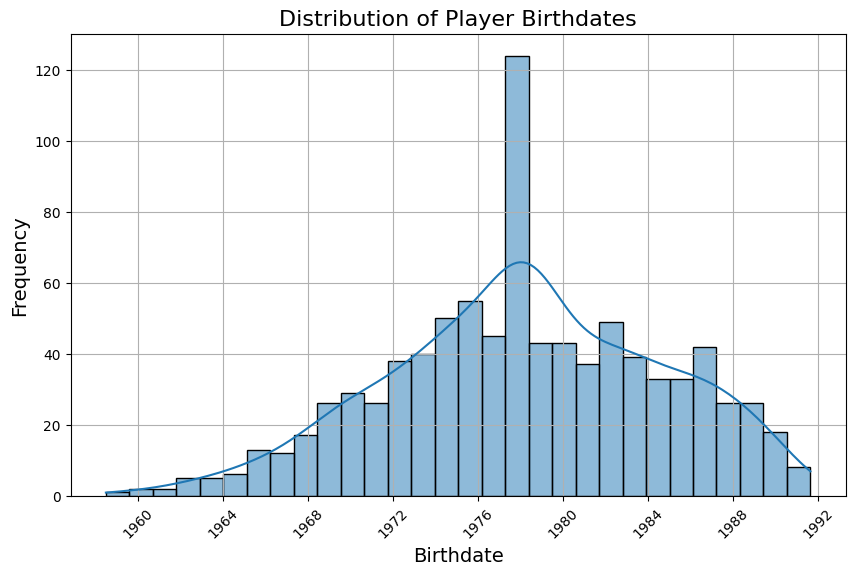

In [54]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram to show the distribution of birthdates
sbn.histplot(players['birthDate'].dropna(), bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Player Birthdates', fontsize=16)
plt.xlabel('Birthdate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

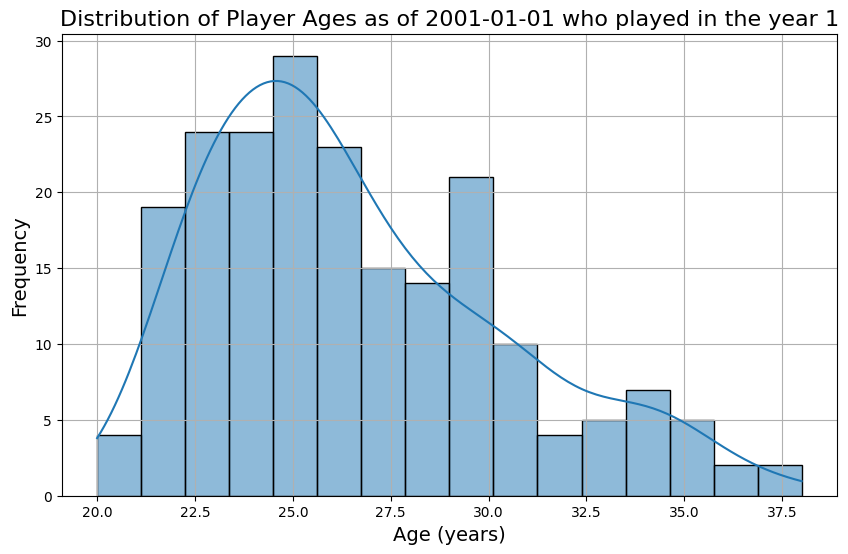

In [71]:
# Specify the year of interest (1 corresponds to the year 2000)
year_of_interest = 1
reference_date = pd.to_datetime('2001-01-01')  # Calculate age as of 2001-01-01

# merge tables players and players_teams : players have 'bioID' and players_teams have 'playerID'
players_in_year = pd.merge(players_teams, players, left_on='playerID', right_on='bioID', how='inner')

# Filter the players who were active in the year of interest
players_in_year = players_in_year[players_in_year['year'] == year_of_interest]

# Calculate age in years
players_in_year['age'] = (reference_date - players_in_year['birthDate']).dt.days // 365.25

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram to show the distribution of ages
sbn.histplot(players_in_year['age'].dropna(), bins=16, kde=True)

# Add titles and labels
plt.title('Distribution of Player Ages as of 2001-01-01 who played in the year 1', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Drop the age column if not needed afterwards
players_in_year.drop('age', axis=1, inplace=True)

In [44]:
# check for invalid death dates with format YYYY-MM-DD
players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')
players[players['deathDate'].isnull()]

C:\Users\marco\AppData\Local\Temp\ipykernel_9024\1412853074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')


,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate,bmi
0,abrahta01w,C,0,0,74.0,190.0,George Washington,NaN,1975-09-27,NaT,24.391892
1,abrossv01w,F,0,0,74.0,169.0,Connecticut,NaN,1980-07-09,NaT,21.695946
2,adairje01w,C,0,0,76.0,197.0,George Washington,NaN,1986-12-19,NaT,23.976974
3,adamsda01w,F-C,0,0,73.0,239.0,Texas A&M,Jefferson College (JC),1989-02-19,NaT,31.528805
4,adamsjo01w,C,0,0,75.0,180.0,New Mexico,NaN,1981-05-24,NaT,22.496000
...,...,...,...,...,...,...,...,...,...,...,...
887,zarafr01w,G,0,0,70.0,146.0,NaN,NaN,1976-12-08,NaT,20.946531
888,zellosh01w,G,0,0,70.0,155.0,Pittsburgh,NaN,1986-08-28,NaT,22.237755
889,zhengha01w,C,0,0,80.0,254.0,NaN,NaN,1967-03-07,NaT,27.900313
891,zirkozu01w,G,0,0,69.0,145.0,NaN,NaN,1980-06-06,NaT,21.410418


The invalid date indicates the player hasnt died yet

In [45]:
# check the unique values of the "pos" column
players['pos'].unique()


array(['C', 'F', 'F-C', 'G', 'F-G', 'G-F', 'C-F'], dtype=object)

In [46]:
# check the unique values of the "firstseason" column
print(players['firstseason'].unique())

# check the unique values of the "lastseason" column
print(players['lastseason'].unique())

[0]
[0]


So the first and last season of every player is 0. We can remove this collumn or calculate them ourselves. TODO

In [47]:
# lets move on to the teams dataframe, how many teams of each conference qualify to the playoffs
# relevant columns: year, confID(EA or WE), playoff(N or Y)
def print_year_results(year):
    temp_teams = teams[(teams['year'] == year) & (teams['playoff'] == 'Y')]
    count_by_conf = temp_teams.groupby('confID').size()
    count_of_ea_teams = count_by_conf.get('EA', 0)
    count_of_we_teams = count_by_conf.get('WE', 0)
    print(f'Year: {year} EA: {count_of_ea_teams} WE: {count_of_we_teams}')


for i in range(1,11):
    print_year_results(i)

Year: 1 EA: 4 WE: 4
Year: 2 EA: 4 WE: 4
Year: 3 EA: 4 WE: 4
Year: 4 EA: 4 WE: 4
Year: 5 EA: 4 WE: 4
Year: 6 EA: 4 WE: 4
Year: 7 EA: 4 WE: 4
Year: 8 EA: 4 WE: 4
Year: 9 EA: 4 WE: 4
Year: 10 EA: 4 WE: 4


4 teams from each conference qualify to the next playoff each year, as it should.

Lets save the changes to another csv file

In [48]:
## put the coaches back
players_with_couches = pd.read_csv('../data/players.csv')
couches = players_with_couches[players_with_couches['pos'].isnull()]

## add the couches to the players dataframe
players = pd.concat([players, couches])

## drop the collumn 'bmi'
players = players.drop(columns=['bmi'])

## save the players dataframe
players.to_csv('../data/clean/players.csv', index=False)

In [49]:
# compare headers and number of lines of both files

clean_players = pd.read_csv('../data/clean/players.csv')
original_players = pd.read_csv('../data/players.csv')

print("(lines, columns)")
print(clean_players.shape)
print(original_players.shape)

(lines, columns)
(893, 10)
(893, 10)


The extra is the BMI which we can drop above